In [0]:
# 目前遇到的問題是不會資料預處理 ----->跑模型數字怪怪的  確認不是模型的問題---->重新確認預處理資料哪裡有問題--->是x及y做one-hot-encoding後在fit時放到舊的x和y所以跑不出答案
# 將資料存到numpy 的 npz檔 之後------>ok

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#  載入套件
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
import keras
import os
import csv
from shutil import copyfile
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D 
from tensorflow.keras.models import Sequential, Model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
IMG_SIZE = 224
class_map = {'A':0, 'B': 1, 'C': 2}

In [0]:
data_path = 'drive/My Drive/Colab Notebooks/AIMango/train/*/*.jpg' 
img_paths = glob(data_path)


data_count = len(img_paths)
print(data_count)
x = np.zeros((data_count, IMG_SIZE, IMG_SIZE, 3))
x = np.float32(x)
y = np.zeros((data_count, ))

# plt.imshow(img)
for i, path in tqdm(enumerate(img_paths)):  #TQDM進度條
    img = cv2.imread(path)
    img = img / 255. # normalize 0~255 -> 0~1
    img = img[:,:,::-1] #BGR -> RGB
    img_resize = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    # img_resize = img_resize.astype(np.float32)
    
    cls = path.split('/')[-2]
    
    x[i] = img_resize
    y[i] = class_map[cls]

5600


In [0]:
np.savez('/content/drive/My Drive/Colab Notebooks/AIMango/x_train1_1.npz', x=x, y=y)

In [0]:
load_x_train = np.load('/content/drive/My Drive/Colab Notebooks/AIMango/x_train1_1.npz')

In [0]:
y = load_x_train['y']
print(y.shape)

(5600,)


In [0]:
x = load_x_train['x']
print(x.shape)

(5600, 224, 224, 3)


In [0]:
data_path2 = 'drive/My Drive/Colab Notebooks/AIMango/dev/*/*.jpg'
img_paths2 = glob(data_path2)

data_count2 = len(img_paths2)
print(data_count2)
x2 = np.zeros((data_count2, IMG_SIZE, IMG_SIZE, 3))
x2 = np.float32(x2)
y2 = np.zeros((data_count2, ))

for i, path in tqdm(enumerate(img_paths2)):  #TQDM進度條
    img2 = cv2.imread(path)
    img2 = img2 / 255. # normalize 0~255 -> 0~1
    img2 = img2[:,:,::-1] #BGR -> RGB
    img2_resize = cv2.resize(img2, (IMG_SIZE, IMG_SIZE))

    cls = path.split('/')[-2]
    
    x2[i] = img2_resize
    y2[i] = class_map[cls]

800


In [0]:
print("type-x:",type(x2[0][0][0][0]))
print("type-y:",type(y2))

type-x: <class 'numpy.float32'>
type-y: <class 'numpy.ndarray'>


In [0]:
np.savez('/content/drive/My Drive/Colab Notebooks/AIMango/x_test1_1.npz', a=x2, b=y2)

In [0]:
load_x_test2 = np.load('/content/drive/My Drive/Colab Notebooks/AIMango/x_test1_1.npz')

In [0]:
y2 = load_x_test2['b']
x2 = load_x_test2['a']

In [0]:
# 打映圖片訓練集的概況
print(type(x))
print(x.shape)

print(x[0].shape)
print(type(x[0]))

<class 'numpy.ndarray'>
(5600, 224, 224, 3)
(224, 224, 3)
<class 'numpy.ndarray'>


In [0]:
# label count
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

# label count
unique, counts = np.unique(y2, return_counts=True)
dict(zip(unique, counts))

{0.0: 243, 1.0: 293, 2.0: 264}

In [0]:
# X = X/255
import tensorflow
y_train_cat = tensorflow.keras.utils.to_categorical(y, num_classes=3)

# X = X/255
y_test_cat = tensorflow.keras.utils.to_categorical(y2, num_classes=3)

In [0]:
# 分配訓練集及測試集比例
x_valid = x2[:400]
y_valid = y_test_cat[:400]
x_test = x2[400:]
y_test = y_test_cat[400:]

In [0]:
x_train.shape, x_test_.shape, y_train.shape, y_test.shape

In [0]:
IMG_SIZE=224

In [0]:
# 3
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = Conv2D(filters=16, kernel_size=3, activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = MaxPool2D(2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = MaxPool2D(2)(x)
x = Flatten()(x)
x = Dense(64, activation=keras.activations.relu)(x)
# x = Dense(128, activation=keras.activations.relu)(x)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=inputs, outputs=prediction)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 128)       0     

In [0]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
model_history = model.fit(x, y_train_cat,
                batch_size=32,
                epochs=15,
                verbose=1,
                validation_data=(x_valid, y_valid))

Epoch 1/15
175/175 [==============================] - 40s 229ms/step - loss: 1.0352 - accuracy: 0.5032 - val_loss: 0.8718 - val_accuracy: 0.6175
Epoch 2/15
175/175 [==============================] - 40s 226ms/step - loss: 0.8310 - accuracy: 0.6082 - val_loss: 0.7236 - val_accuracy: 0.6900
Epoch 3/15
175/175 [==============================] - 40s 227ms/step - loss: 0.7286 - accuracy: 0.6689 - val_loss: 0.7162 - val_accuracy: 0.7200
Epoch 4/15
175/175 [==============================] - 39s 226ms/step - loss: 0.6207 - accuracy: 0.7250 - val_loss: 0.7205 - val_accuracy: 0.6825
Epoch 5/15
175/175 [==============================] - 40s 226ms/step - loss: 0.5141 - accuracy: 0.7827 - val_loss: 0.8396 - val_accuracy: 0.6700
Epoch 6/15
175/175 [==============================] - 40s 226ms/step - loss: 0.3800 - accuracy: 0.8487 - val_loss: 0.9551 - val_accuracy: 0.7075
Epoch 7/15
175/175 [==============================] - 40s 227ms/step - loss: 0.2495 - accuracy: 0.9043 - val_loss: 1.0757 - val_ac

In [0]:
zhistory = model_history.history

Text(0.5, 1.0, 'acc')

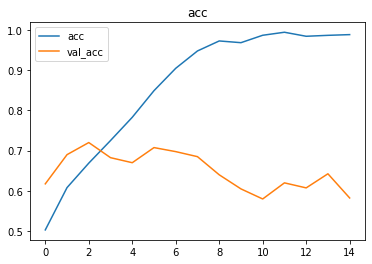

In [0]:
plt.plot(zhistory['accuracy'])
plt.plot(zhistory['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('acc')

Text(0.5, 1.0, 'loss')

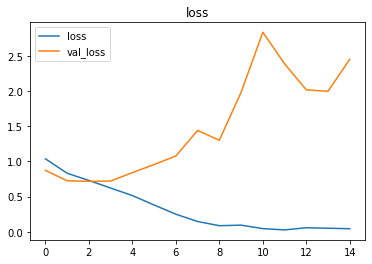

In [0]:
plt.plot(zhistory['loss'])
plt.plot(zhistory['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = np.argmax(y_test, axis=-1)
y_pred = np.argmax(model.predict(x_test), axis=-1)   #argmax 將每格中最大的值丟出
print(y_true.shape, y_pred.shape)
target_names = [str(i) for i in range(3)]
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))


(400,) (400,)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.59      0.55      0.57       136
           2       0.84      0.72      0.77       264

    accuracy                           0.66       400
   macro avg       0.48      0.42      0.45       400
weighted avg       0.75      0.66      0.70       400

[[  0   0   0]
 [ 25  75  36]
 [ 22  53 189]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
